# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [34]:
import numpy
import pandas
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [35]:
df = pandas.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [36]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [37]:
print(df['YEAR'].max()-df['YEAR'].min())

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [38]:
dfm = df.loc[df['STATE'] == "MICHIGAN"]
dfo = df.loc[df['STATE'] == "OHIO"]
print("Michigan: ", dfm['AVG_MATH_8_SCORE'].mean())
print("Ohio: ", dfo['AVG_MATH_8_SCORE'].mean())

Michigan:  276.1666666666667
Ohio:  282.25


Find the average for your outcome score across all states in 2019

In [39]:
dfx = df.loc[df['YEAR'] == 2019]
print(dfx['AVG_MATH_8_SCORE'].mean())

281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [40]:
dfy = df.groupby("STATE")
dfy['AVG_MATH_8_SCORE'].mean()

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [41]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
df['INSTR_EXP_PERCENTAGE'] = df['INSTRUCTION_EXPENDITURE']/df['TOTAL_REVENUE'] * 100
dfH = df.loc[df['YEAR'] == 2015]
dfH.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTR_EXP_PERCENTAGE
1173,2015_ALABAMA,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,...,55792.0,50668.0,452764.0,222182.0,743789.0,231.0,267.0,217.0,259.0,51.866357
1174,2015_ALASKA,ALASKA,2015,130755.0,2920986.0,344111.0,2026555.0,550320.0,2968341.0,1484610.0,...,9400.0,9651.0,80011.0,38688.0,132477.0,236.0,280.0,213.0,260.0,50.825646
1175,2015_ARIZONA,ARIZONA,2015,944978.0,8230507.0,1093834.0,3232013.0,3904660.0,7902600.0,3846357.0,...,84084.0,84854.0,687144.0,333579.0,1109040.0,238.0,283.0,215.0,263.0,46.732929
1176,2015_ARKANSAS,ARKANSAS,2015,479682.0,5308625.0,581412.0,4075118.0,652095.0,5350543.0,2620399.0,...,36882.0,32385.0,296050.0,142242.0,492132.0,235.0,275.0,218.0,259.0,49.361162
1177,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,465322.0,492835.0,3748465.0,1941009.0,6226737.0,232.0,275.0,213.0,259.0,49.780093


Feature engineering justification: **My goal is to identify the relationship between the percentage of revenue spent on education and Math exam scores in 8th graders. Thus, I removed all rows that were missing any of the values in question (AVG_MATH_8_SCORE, TOTAL_REVENUE, INSTRUCTION_EXPENDITURE) and created a new column called INSTR_EXP_PERCENTAGE to calculate the percentage of revenue spent on education.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot: xlabel='STATE'>

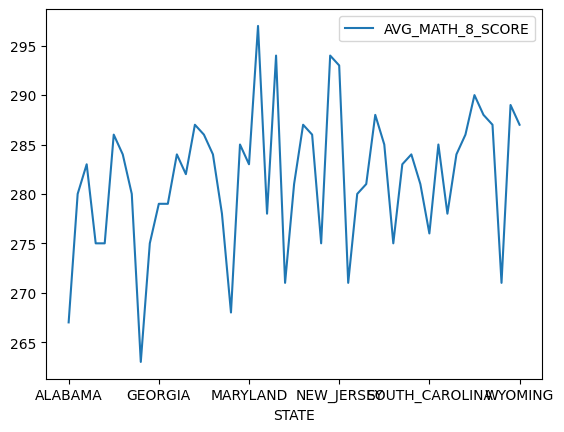

In [42]:
dfH.plot(x='STATE', y='AVG_MATH_8_SCORE')

**Average Math Score for Eighth Graders in each State**

**Visualization 2**

<AxesSubplot: xlabel='STATE'>

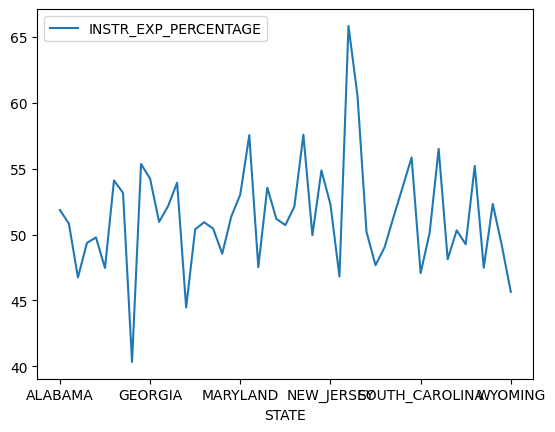

In [43]:
dfH.plot(x='STATE', y='INSTR_EXP_PERCENTAGE')

**Percentage of Revenue spent on Instruction Expenditures per State**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = dfH[['AVG_MATH_8_SCORE', 'AVG_MATH_4_SCORE']]
y = dfH['INSTR_EXP_PERCENTAGE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [48]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [49]:
# create your model here
model = LinearRegression()

In [51]:
#X_train.reshape(-1,1)
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [55]:
import matplotlib.pyplot as plt

print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

23.786764412548344
[-0.11405844  0.24906313]


-0.04496780473254791

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

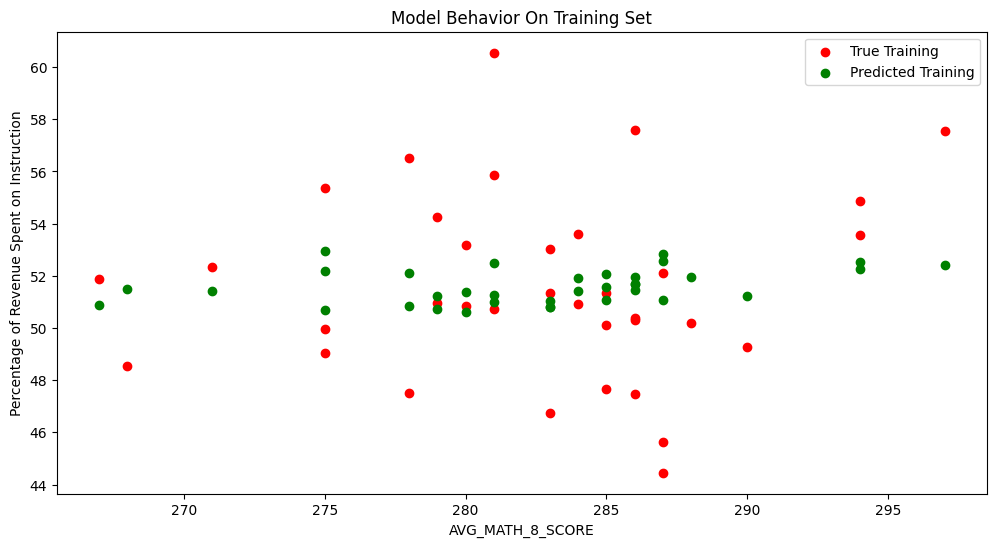

In [60]:
import matplotlib.pyplot as plt

col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Percentage of Revenue Spent on Instruction')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

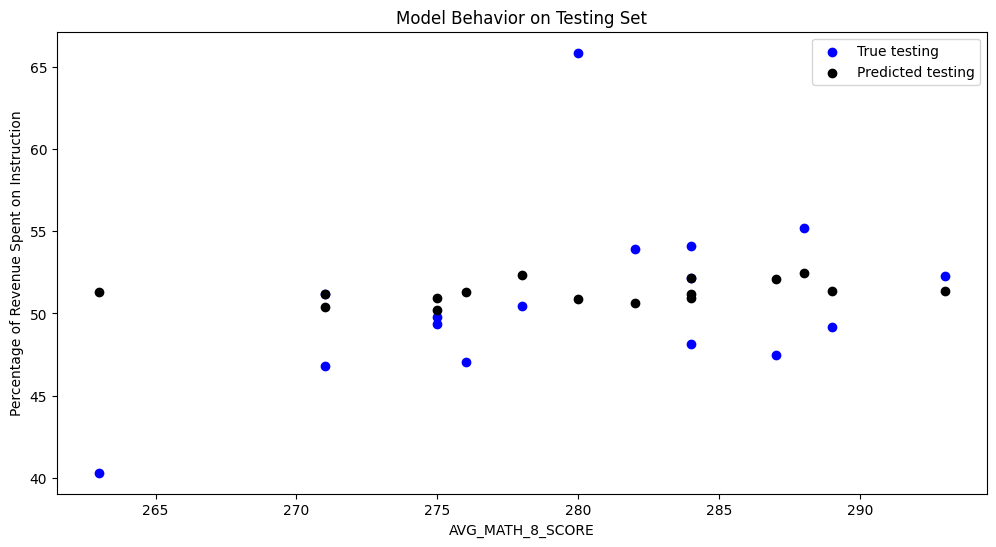

In [62]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Percentage of Revenue Spent on Instruction')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The goal of my model was to use Average Math exam scores of 4th and 8th graders to predict the percentage of revenue spent on instruction expenditures. It seems like my model works just alright on the training set but fits better to the testing set. This may be due to a discrepancy in sample sizes.